# Supplementary Information: Eddy Statistics in the Gulf Stream Region
##### g.marechal (Toulouse, August 2025)

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import os
import cartopy.crs as ccrs
from src import *

In [5]:
file_AMEDA = '../data/DYNED_GS_FULL_1y.nc'
path_output = '../figures/'

In [6]:
ds_AMEDA = xr.open_dataset(file_AMEDA)
# path_model = '' # request the model outputs to the authors
model_name = 'WW3/'
# file_name = 'combine_ww3_daily_with_mean_period_and_dp_additional_variable.nc'
type_run = 'FULL/'
ds_ww3 = xr.open_dataset(path_model_data + model_name + type_run + file_name)
ds_ww3 = ds_ww3[['ucur', 'vcur']]

In [7]:
ds_large_scale = ds_ww3.mean(dim = 'time') # large scale GS

### Mask the mean GulfStream Path

In [8]:
U_large_scale = (ds_large_scale.ucur**2 + ds_large_scale.vcur**2)**(1/2)
U_large_scale_masked = np.ma.masked_where(U_large_scale.values<.35, U_large_scale)

### Eddy concentration

In [9]:
deg_res = .5
# --- Define Grid
x_grid = np.arange(ds_large_scale.longitude.values.min(), ds_large_scale.longitude.values.max(), deg_res)
y_grid = np.arange(ds_large_scale.latitude.values.min(), ds_large_scale.latitude.values.max(), deg_res)

# --- Extract point coordinates associated with cyclones
lon_points = ds_AMEDA.x_cen[ds_AMEDA.Ro.values>0].values.flatten()
lat_points = ds_AMEDA.y_cen[ds_AMEDA.Ro.values>0].values.flatten()


concentration_cyclone = eddy_concentration(lon_points, lat_points, x_grid, y_grid)
n_cyc_eddy = len(lon_points)/len(ds_AMEDA.x_cen.values) * 100
# --- Extract point coordinates associated with anticyclones

lon_points = ds_AMEDA.x_cen[ds_AMEDA.Ro.values<0].values.flatten()
lat_points = ds_AMEDA.y_cen[ds_AMEDA.Ro.values<0].values.flatten()

concentration_anticyclone = eddy_concentration(lon_points, lat_points, x_grid, y_grid)
n_ac_eddy = len(lon_points)/len(ds_AMEDA.x_cen.values) * 100

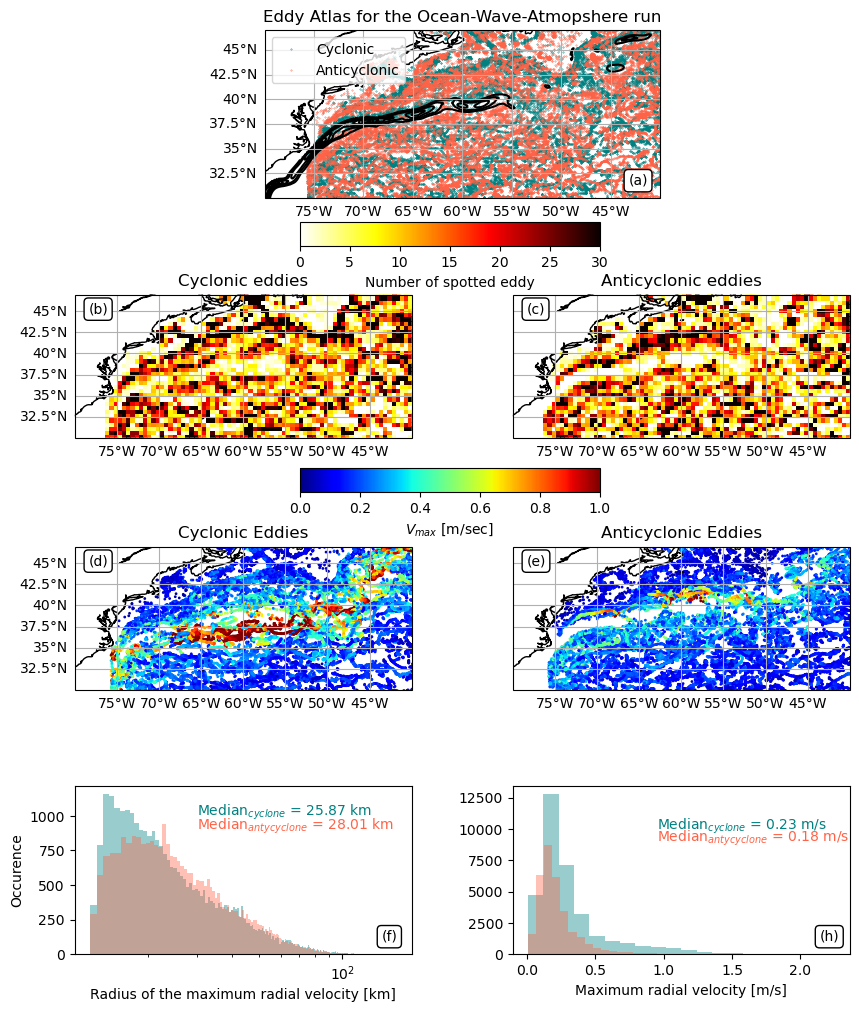

In [12]:
props1 = dict(boxstyle='round', facecolor='w', alpha=1)

# Create a figure
fig = plt.figure(figsize=(10, 12))

# Define GridSpec: 4 rows, 2 columns
gs = gridspec.GridSpec(4, 2, figure=fig, height_ratios=[1, 1, 1, 1], hspace=0.5, wspace=0.3)


ax = fig.add_subplot(gs[0, :], projection=ccrs.PlateCarree())
plt.text(0.92, 0.08, '(a)',
     transform = ax.transAxes, bbox = props1)
# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-80, -40, 30, 47], ccrs.PlateCarree())
ax.coastlines()

ax.plot(ds_AMEDA.x_cen[ds_AMEDA.Ro.values>0], ds_AMEDA.y_cen[ds_AMEDA.Ro.values>0], marker = 'o', color = 'teal', linewidth = 0, markersize = .3, label = 'Cyclonic')
ax.plot(ds_AMEDA.x_cen[ds_AMEDA.Ro.values<0], ds_AMEDA.y_cen[ds_AMEDA.Ro.values<0], marker = 'o', color = 'tomato', linewidth = 0, markersize = .3, label = 'Anticyclonic')

ax.contour(ds_large_scale.longitude, ds_large_scale.latitude, U_large_scale_masked, colors = 'k')
ax.set_title('Eddy Atlas for the Ocean-Wave-Atmopshere run')
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
plt.legend()

ax = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree())
ax.set_extent([-80, -40, 30, 47], ccrs.PlateCarree())
ax.coastlines()
plt.text(0.04, 0.87, '(b)',
     transform = ax.transAxes, bbox = props1)
p1 = ax.pcolor(x_grid[:-1], y_grid[:-1], concentration_cyclone.T,  vmin = 0, vmax = 30, cmap = 'hot_r')
# ax.contour(ds_large_scale.nav_lon, ds_large_scale.nav_lat, U_large_scale_masked, colors = 'k')

ax.set_title('Cyclonic eddies')
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False


ax = fig.add_subplot(gs[1, 1], projection=ccrs.PlateCarree())
plt.text(0.04, 0.87, '(c)',
     transform = ax.transAxes, bbox = props1)
ax.set_extent([-80, -40, 30, 47], ccrs.PlateCarree())
ax.coastlines()

p1 = ax.pcolor(x_grid[:-1], y_grid[:-1], concentration_anticyclone.T,  vmin = 0, vmax = 30, cmap = 'hot_r')
# ax.contour(ds_large_scale.nav_lon, ds_large_scale.nav_lat, U_large_scale_masked, colors = 'k')

cax = fig.add_axes([.35, .7, 0.3, 0.02])
cbar = plt.colorbar(p1, cax = cax, orientation = 'horizontal')
cbar.ax.set_xlabel('Number of spotted eddy')
ax.set_title('Anticyclonic eddies')
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.left_labels = False


ax = fig.add_subplot(gs[2, 0], projection=ccrs.PlateCarree())
plt.text(0.04, 0.87, '(d)',
     transform = ax.transAxes, bbox = props1)
ax.set_extent([-80, -40, 30, 47], ccrs.PlateCarree())
ax.coastlines()
ax.scatter(ds_AMEDA.x_cen[ds_AMEDA.Ro.values>0], ds_AMEDA.y_cen[ds_AMEDA.Ro.values>0],\
          c = ds_AMEDA.v_max[ds_AMEDA.Ro.values>0], s = 1, vmin = 0, vmax = 1, cmap = 'jet')
ax.set_title('Cyclonic Eddies')

gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False


ax = fig.add_subplot(gs[2, 1], projection=ccrs.PlateCarree())
plt.text(0.04, 0.87, '(e)',
     transform = ax.transAxes, bbox = props1)
ax.set_extent([-80, -40, 30, 47], ccrs.PlateCarree())
ax.coastlines()
s2 = ax.scatter(ds_AMEDA.x_cen[ds_AMEDA.Ro.values<0], ds_AMEDA.y_cen[ds_AMEDA.Ro.values<0],\
          c = ds_AMEDA.v_max[ds_AMEDA.Ro.values<0], s = 1, vmin = 0, vmax = 1, cmap = 'jet')

gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.left_labels = False
ax.set_title('Anticyclonic Eddies')
cax = fig.add_axes([.35, .495, 0.3, 0.02])
cbar = plt.colorbar(s2, orientation = 'horizontal', cax = cax)
cbar.ax.set_xlabel('$V_{max}$ [m/sec]')


ax = fig.add_subplot(gs[3, 0])
plt.text(0.91, 0.08, '(f)',
     transform = ax.transAxes, bbox = props1)
ds_AMEDA.r_max[ds_AMEDA.Ro.values>0].plot.hist(ax=ax, bins = 200, alpha = .4, color = 'teal')
ds_AMEDA.r_max[ds_AMEDA.Ro.values<0].plot.hist(ax=ax, bins = 200, alpha = .4, color = 'tomato')
ax.set_xlabel('Radius of the maximum radial velocity [km]')

ax.text(30, 1000, 'Median$_{cyclone}$ = %.2f km'%np.median(ds_AMEDA.r_max[ds_AMEDA.Ro.values>0]), color = 'teal')
ax.text(30, 900, 'Median$_{antycyclone}$ = %.2f km'%np.median(ds_AMEDA.r_max[ds_AMEDA.Ro.values<0]), color = 'tomato')
ax.set_ylabel('Occurence')
ax.set_xscale('log')
ax = fig.add_subplot(gs[3, 1])
plt.text(0.91, 0.08, '(h)',
     transform = ax.transAxes, bbox = props1)
ds_AMEDA.v_max[ds_AMEDA.Ro.values>0].plot.hist(ax=ax, bins = 20, alpha = .4, color = 'teal')
ds_AMEDA.v_max[ds_AMEDA.Ro.values<0].plot.hist(ax=ax, bins = 20, alpha = .4, color = 'tomato')

ax.text(.95, 10000, 'Median$_{cyclone}$ = %.2f m/s'%np.median(ds_AMEDA.v_max[ds_AMEDA.Ro.values>0]), color = 'teal')
ax.text(.95, 9000, 'Median$_{antycyclone}$ = %.2f m/s'%np.median(ds_AMEDA.v_max[ds_AMEDA.Ro.values<0]), color = 'tomato')
ax.set_xlabel('Maximum radial velocity [m/s]')

plt.savefig(path_output + 'SI_eddy_statistic.png', bbox_inches = 'tight', dpi = 300)